<a href="https://colab.research.google.com/github/ianomunga/NumPyML/blob/main/MNIST%20NumPy%20Neural%20Network%20From%20Scratch_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#load all the dependent libraries, NumPy, Pandas & MatplotLib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
#load MNIST training dataset
data = pd.read_csv('/content/sample_data/mnist_test.csv')
#to confirm that the dataset was loaded correctly
data.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648,0.649,0.650,0.651,0.652,0.653,0.654,0.655,0.656,0.657,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
#to convert the Pandas DataFrame into a NumPy Array that can be wrangled mathematically
data = np.array(data)
m, n = data.shape

In [5]:
#randomize the order of data by shuffling before splitting it into dev and training sets
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255
_, m_train = X_train.shape


#to check out the first column
X_train[:, 0].shape

(784,)

In [6]:
Y_train

array([2, 3, 0, ..., 2, 0, 9])

Initialize the model's parametres and define the Rectified Linearn Unit [ReLu] activation function, the softmax activation function, one-hot encoding, forward & backward propagation and the parametre updating function 

In [8]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [9]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [19]:
#Run the model to learn the weights 
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.50, 1000)

Iteration:  0
[1 8 8 ... 8 1 8] [2 3 0 ... 2 0 9]
0.07611956884098234
Iteration:  10
[2 3 8 ... 6 2 8] [2 3 0 ... 2 0 9]
0.3075897321924658
Iteration:  20
[2 3 5 ... 2 0 5] [2 3 0 ... 2 0 9]
0.4907211912434715
Iteration:  30
[2 3 8 ... 2 0 5] [2 3 0 ... 2 0 9]
0.6279586620735638
Iteration:  40
[2 3 6 ... 2 0 8] [2 3 0 ... 2 0 9]
0.6831870207800866
Iteration:  50
[2 3 6 ... 2 0 8] [2 3 0 ... 2 0 9]
0.7147460828980998
Iteration:  60
[2 3 6 ... 2 0 8] [2 3 0 ... 2 0 9]
0.7025225025002778
Iteration:  70
[2 3 6 ... 2 0 8] [2 3 0 ... 2 0 9]
0.728747638626514
Iteration:  80
[2 3 6 ... 2 0 8] [2 3 0 ... 2 0 9]
0.7510834537170796
Iteration:  90
[2 3 0 ... 2 0 8] [2 3 0 ... 2 0 9]
0.7750861206800755
Iteration:  100
[2 3 0 ... 2 0 8] [2 3 0 ... 2 0 9]
0.7920880097788643
Iteration:  110
[2 3 0 ... 2 0 8] [2 3 0 ... 2 0 9]
0.8073119235470608
Iteration:  120
[2 3 0 ... 2 0 8] [2 3 0 ... 2 0 9]
0.8196466274030448
Iteration:  130
[2 3 0 ... 2 0 9] [2 3 0 ... 2 0 9]
0.8304256028447605
Iteration:  140
[

In [21]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


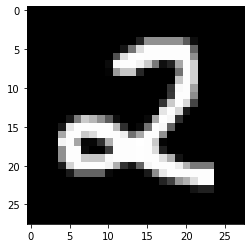

Prediction:  [3]
Label:  3


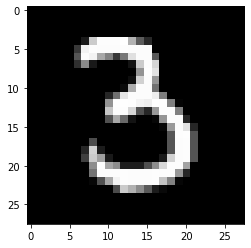

Prediction:  [0]
Label:  0


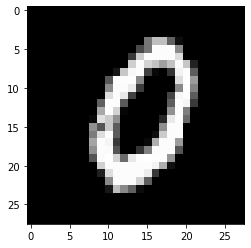

Prediction:  [7]
Label:  7


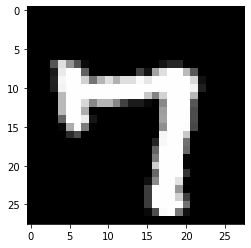

In [22]:
#Test out the model's performance on test data
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [23]:
#Test the model on validation data
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[3 9 2 3 8 1 6 9 7 1 3 1 5 9 3 8 3 1 9 6 1 3 0 5 7 7 4 1 4 9 7 2 1 6 0 1 0
 7 4 5 4 2 3 4 4 1 2 0 7 8 9 1 2 7 6 8 7 8 2 9 7 8 7 3 4 3 0 5 1 2 0 3 1 9
 7 3 1 6 5 7 3 2 6 4 4 3 9 3 6 9 9 9 4 9 1 0 6 6 5 4 6 3 7 4 5 3 0 9 5 4 8
 7 7 4 3 7 8 0 2 0 6 9 9 4 5 5 1 6 7 3 6 0 7 6 3 3 9 8 7 2 2 5 7 7 4 4 1 3
 2 7 7 7 3 9 8 1 0 2 7 3 7 0 5 4 6 7 1 6 0 5 4 5 9 3 7 4 1 9 2 1 8 4 1 5 6
 8 8 7 4 3 0 3 5 4 1 1 4 4 3 6 0 1 4 5 3 3 1 7 3 2 2 9 0 0 4 1 0 0 9 9 7 6
 7 4 4 4 2 6 6 3 4 0 6 5 5 9 5 4 8 1 9 1 9 2 3 0 0 1 7 0 2 7 1 2 5 1 7 7 1
 0 5 4 1 2 2 7 7 7 0 9 4 8 7 2 0 1 5 0 4 0 9 0 0 4 2 7 2 3 1 8 5 4 6 8 6 8
 1 9 0 5 1 8 0 0 6 5 6 1 7 7 8 9 5 4 7 3 6 8 5 6 0 5 9 9 8 5 8 3 9 9 9 2 8
 7 4 8 4 8 8 7 7 4 2 8 1 6 0 6 0 1 4 4 5 6 8 3 5 2 5 2 3 2 1 7 6 1 1 7 5 5
 2 7 2 4 8 3 0 8 3 1 5 4 8 7 2 2 6 0 3 3 1 8 5 6 4 7 7 9 2 2 2 9 3 1 9 8 7
 1 7 1 8 9 3 1 2 8 2 0 0 4 8 8 5 6 9 4 6 9 7 8 1 8 8 2 9 6 5 8 2 0 3 3 0 9
 8 9 5 8 9 4 5 2 9 1 1 8 2 7 4 6 3 7 0 7 3 9 9 7 4 8 7 9 3 6 6 7 0 6 1 9 4
 9 1 6 6 7 8 9 4 1 2 7 4 

0.911

We see that the model is now able to accurately perform digit recognition 91 percent of the time, after tweaking the hyper-parametres to end up with an optimal combination of an alpha, the learning rate at 0.5 and the number of training epochs at 1000. 

These results would are likely repeatable with different hyperparametres due to how data-dependent they are. 